In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Preparing the data

In [2]:
train_data_dir = '/kaggle/input/classification-fruits/Test/Test'
test_data_dir = '/kaggle/input/classification-fruits/Train/Train'

In [3]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir)
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir)

Found 12335 files belonging to 16 classes.
Found 3200 files belonging to 16 classes.


In [4]:
class_names = train_data.class_names
num_classes = len(class_names)
num_classes

16

## Normalizing the values between 0 - 1

In [5]:
train_data = train_data.map(lambda x,y: (x/255, y))
test_data = test_data.map(lambda x,y: (x/255, y))

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

In [7]:
train_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Creating the model

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(16, (3, 3), input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

# Fitting the model

In [12]:
cp = ModelCheckpoint('models/model', save_best_only=True)

In [13]:
hist = model.fit(train_data, epochs=20, validation_data=test_data, callbacks=[cp])

Epoch 1/20
386/386 [==============================] - 115s 263ms/step - loss: 1.4945 - accuracy: 0.5323 - val_loss: 0.8797 - val_accuracy: 0.7244
Epoch 2/20
386/386 [==============================] - 73s 187ms/step - loss: 0.8066 - accuracy: 0.7334 - val_loss: 0.8418 - val_accuracy: 0.7266
Epoch 3/20
386/386 [==============================] - 73s 189ms/step - loss: 0.6583 - accuracy: 0.7855 - val_loss: 0.6164 - val_accuracy: 0.7884
Epoch 4/20
386/386 [==============================] - 73s 188ms/step - loss: 0.5355 - accuracy: 0.8298 - val_loss: 0.5246 - val_accuracy: 0.8378
Epoch 5/20
386/386 [==============================] - 74s 190ms/step - loss: 0.4484 - accuracy: 0.8608 - val_loss: 0.4000 - val_accuracy: 0.8766
Epoch 6/20
386/386 [==============================] - 73s 187ms/step - loss: 0.3854 - accuracy: 0.8854 - val_loss: 0.3586 - val_accuracy: 0.8919
Epoch 7/20
386/386 [==============================] - 71s 183ms/step - loss: 0.3545 - accuracy: 0.8957 - val_loss: 0.3859 - val_a

# Loading the Model

In [14]:
saved_model = tf.keras.models.load_model('/kaggle/working/models/model')

In [15]:
saved_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
loss, accuracy = saved_model.evaluate(test_data)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

100/100 [==============================] - 44s 402ms/step - loss: 0.1791 - accuracy: 0.9591
Loss: 0.17912092804908752
Accuracy: 0.9590625166893005


# Plotting the model's loss and accuracy

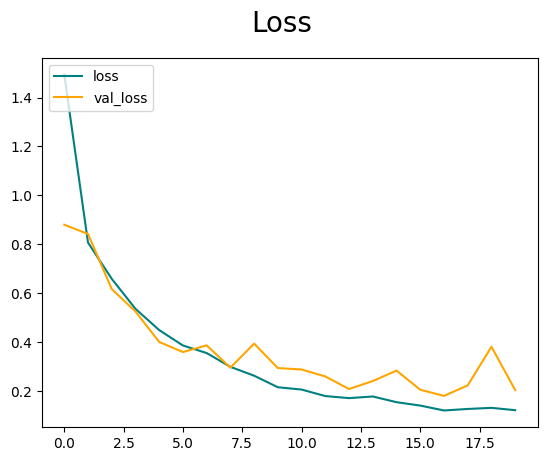

In [17]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

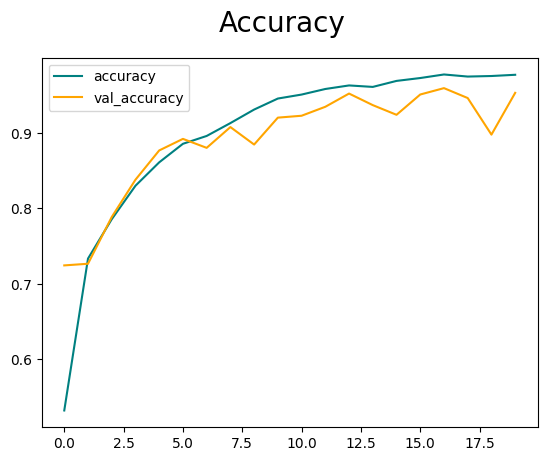

In [18]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [19]:
import cv2

# Testing

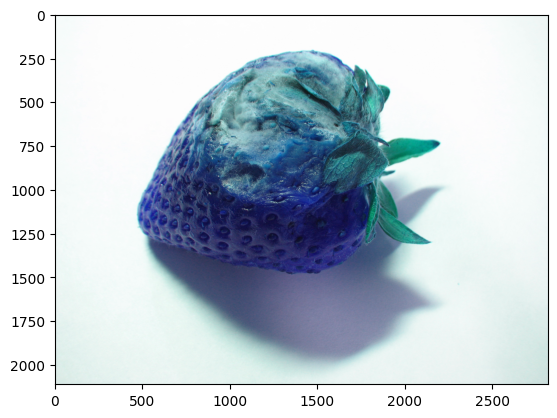

In [20]:
img_rottenstrawberry = cv2.imread('/kaggle/input/rotten-fresh-fruit-tests/rotten_strawberry_test.jpg')
plt.imshow(img_rottenstrawberry)
plt.show()

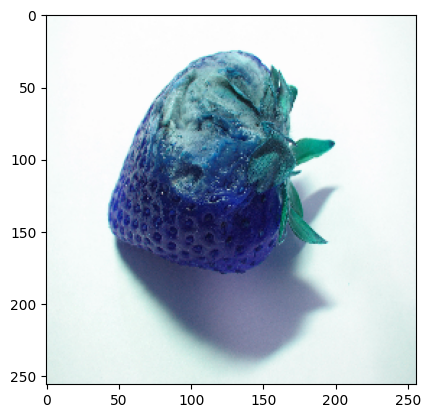

In [21]:
resize_rottenstrawberry = tf.image.resize(img_rottenstrawberry, (256,256))
plt.imshow(resize_rottenstrawberry.numpy().astype(int))
plt.show()

In [22]:
yhat_rottenstrawberry = saved_model.predict(np.expand_dims(resize_rottenstrawberry/255, 0))

1/1 [==============================] - 0s 332ms/step


In [23]:
predicted_class_index_rottenstrawberry = np.argmax(yhat_rottenstrawberry)

In [24]:
predicted_class_label_rottenstrawberry = class_names[predicted_class_index_rottenstrawberry]

In [25]:
print("Predicted Class:", predicted_class_label_rottenstrawberry)

Predicted Class: RottenStrawberry


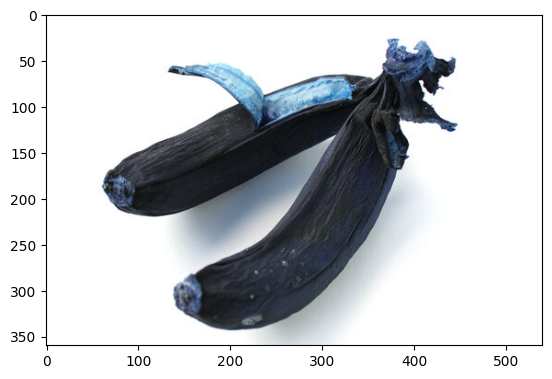

In [32]:
img_rottenbanana = cv2.imread('/kaggle/input/rotten-fresh-fruit-tests/rotttenbanana.jpg')
plt.imshow(img_rottenbanana)
plt.show()

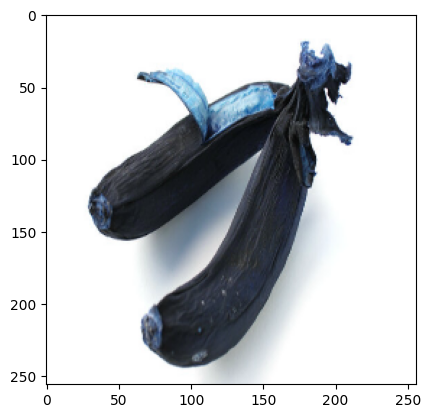

In [33]:
resize_rottenbanana = tf.image.resize(img_rottenbanana, (256,256))
plt.imshow(resize_rottenbanana.numpy().astype(int))
plt.show()

In [34]:
yhat_rottenbanana = saved_model.predict(np.expand_dims(resize_rottenbanana/255, 0))

1/1 [==============================] - 0s 21ms/step


In [35]:
predicted_class_index_rottenbanana = np.argmax(yhat_rottenbanana)

In [36]:
predicted_class_label_rottenbanana = class_names[predicted_class_index_rottenbanana]

In [37]:
print("Predicted Class:", predicted_class_label_rottenbanana)

Predicted Class: RottenBanana
